<a href="https://colab.research.google.com/github/karielson/PPGEP9002_INTELIGENCIA_COMPUTACIONAL/blob/main/Agrupamento_de_Textos_(Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalação das bibliotecas necessárias
!pip install nltk
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install umap-learn
!pip install tensorflow
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


In [2]:
# Agrupamento de Textos com Processamento de Linguagem Natural
# UFRN - DEE - ELE 606 2024.2

import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns




In [7]:
# Download dos recursos necessários do NLTK
print("Baixando recursos necessários do NLTK...")
import nltk

# Baixar recursos necessários do NLTK com mais detalhes
nltk.download('punkt', quiet=False)
nltk.download('stopwords', quiet=False)
nltk.download('rslp', quiet=False)
print("Downloads concluídos.")
nltk.download('punkt_tab')

Baixando recursos necessários do NLTK...
Downloads concluídos.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Por favor, faça o upload do arquivo CSV quando solicitado...


Saving Base_dados_textos_6_classes.csv to Base_dados_textos_6_classes (2).csv
Dataset carregado com sucesso, contendo 319 linhas
Iniciando pré-processamento dos textos...
Pré-processamento concluído.

Realizando vetorização TF-IDF...
Matriz de características: (319, 695)

Realizando redução de dimensionalidade...


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



Realizando análise de agrupamento...

Processando K-Means...

Visualizando agrupamentos de K-Means...


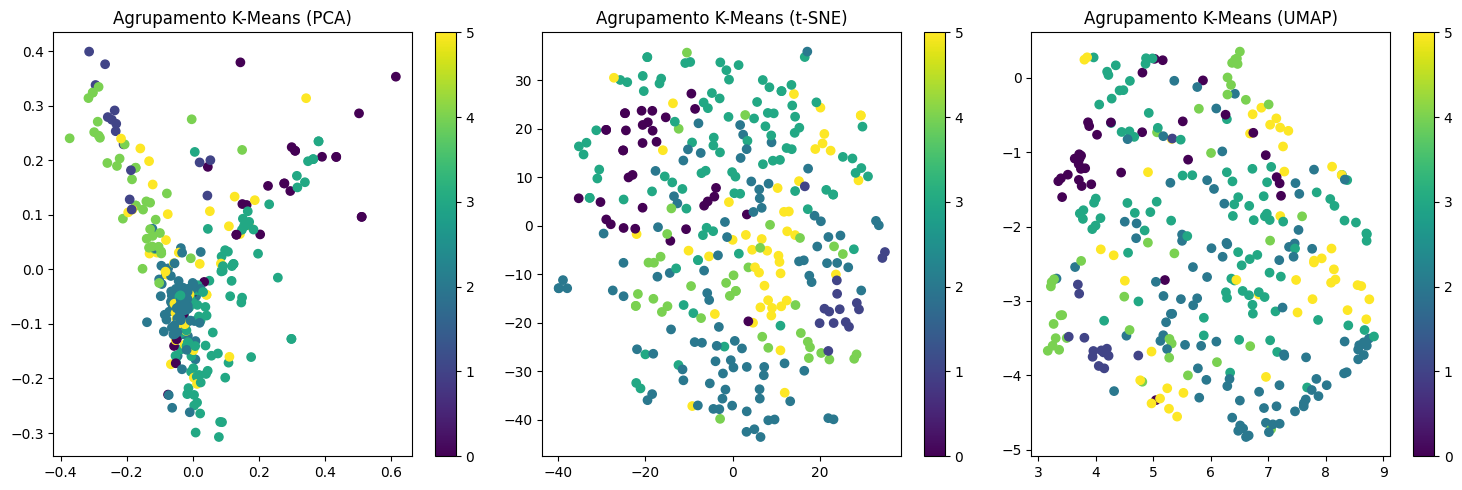


Processando DBSCAN...

Visualizando agrupamentos de DBSCAN...


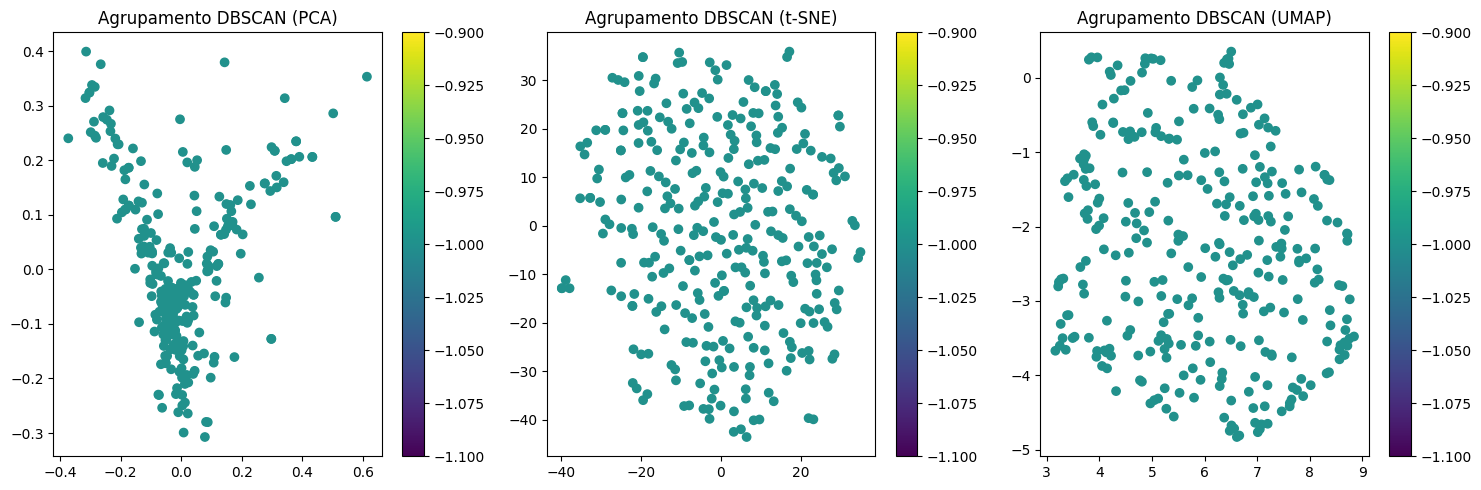


Processando Agrupamento Aglomerativo...

Visualizando agrupamentos de Agrupamento Aglomerativo...


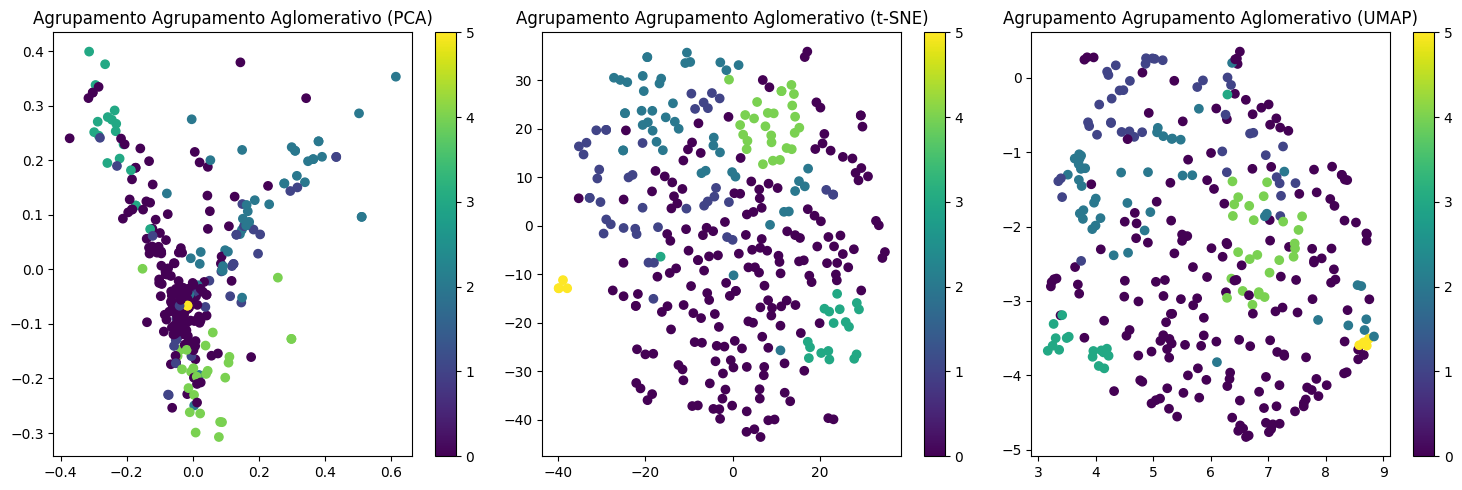


Processando Modelo de Mistura Gaussiana...

Visualizando agrupamentos de Modelo de Mistura Gaussiana...


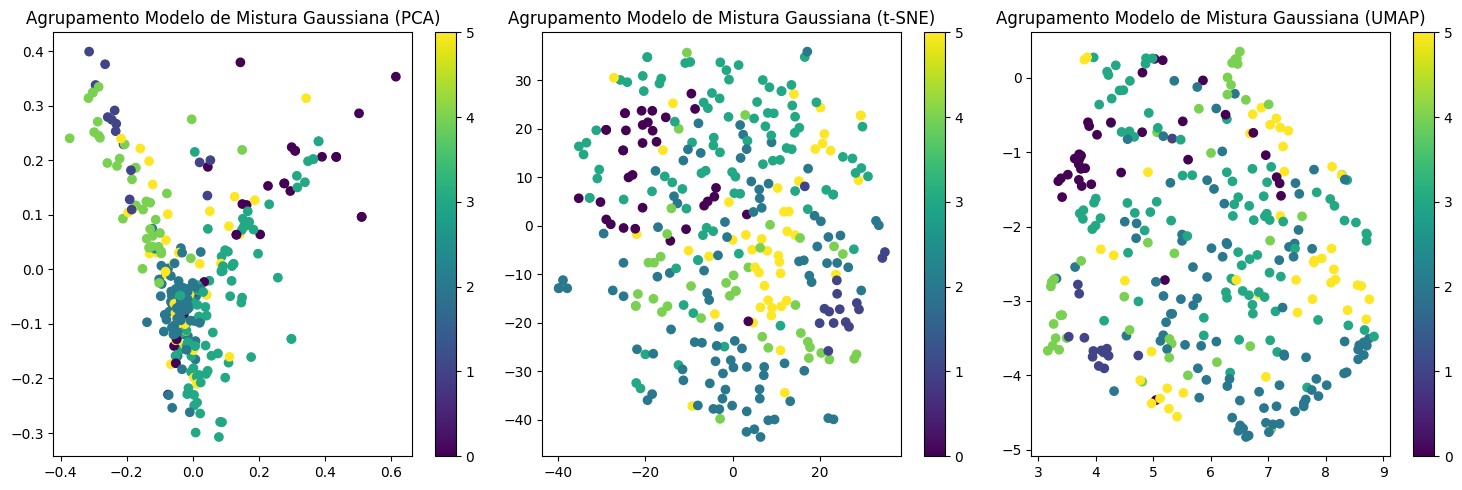


Resultados do Agrupamento:
                            Índice de Silhueta Índice Davies-Bouldin
K-Means                               0.016987              5.879713
DBSCAN                                     N/A                   N/A
Agrupamento Aglomerativo              0.025193              4.568896
Modelo de Mistura Gaussiana           0.016987              5.879713

Resultados salvos em 'resultados_agrupamento.csv'

Comparando resultados do agrupamento com classes originais...


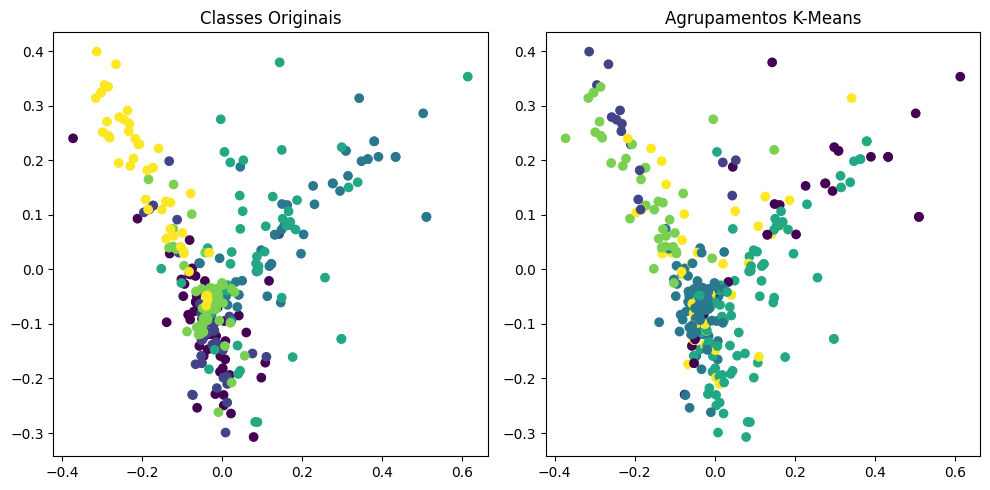

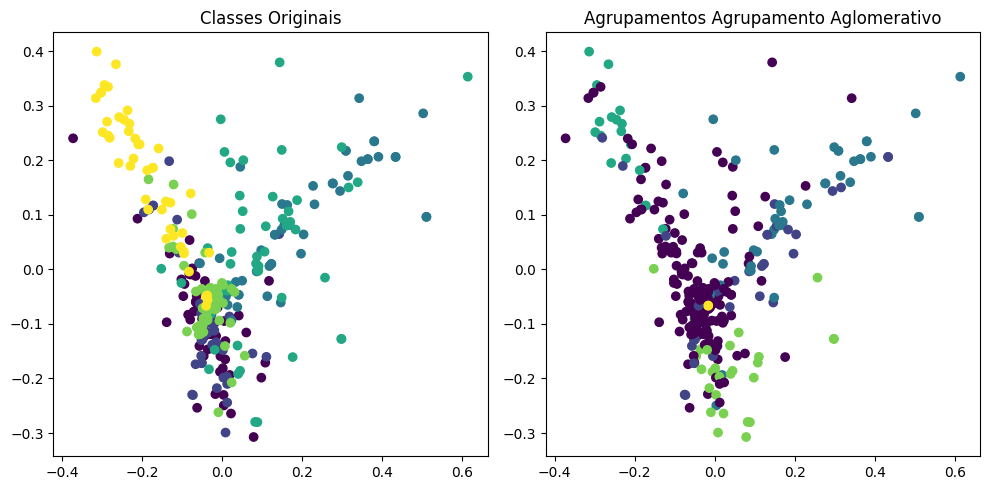

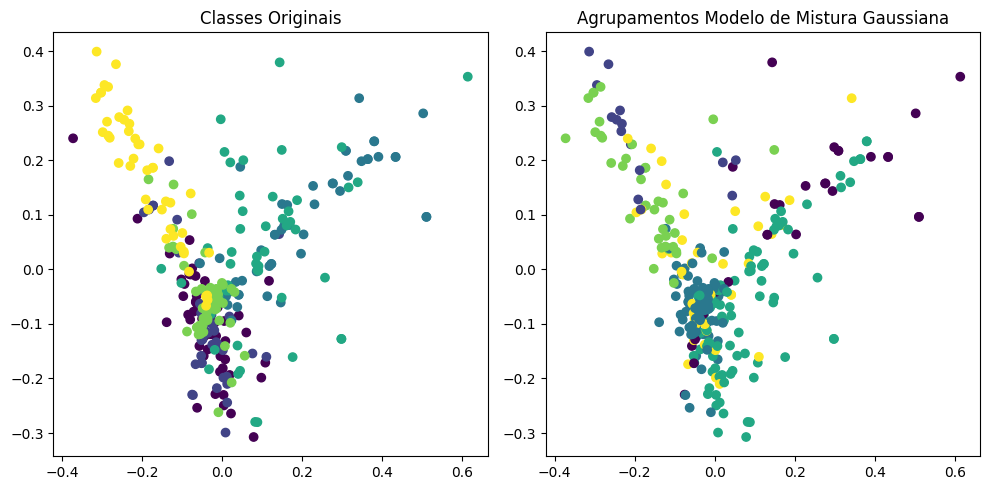

In [8]:

# Montar Google Drive para acessar arquivos
from google.colab import drive
drive.mount('/content/drive')

# Widget de upload de arquivo
from google.colab import files
print("Por favor, faça o upload do arquivo CSV quando solicitado...")
uploaded = files.upload()

# Ler o arquivo CSV com tratamento de erros
try:
    df = pd.read_csv('Base_dados_textos_6_classes.csv', sep=';', encoding='latin1')
    print(f"Dataset carregado com sucesso, contendo {len(df)} linhas")
except Exception as e:
    print(f"Erro ao carregar arquivo CSV: {str(e)}")
    raise

# Função de pré-processamento de texto
def preprocessar_texto(texto):
    try:
        # Garantir que o texto seja string
        texto = str(texto)

        # Converter para minúsculas
        texto = texto.lower()

        # Remover caracteres especiais e números
        texto = re.sub(r'[^a-záàâãéèêíïóôõöúçñ\s]', '', texto)

        # Tokenização com tratamento de erro
        try:
            tokens = word_tokenize(texto, language='portuguese')
        except Exception as e:
            print(f"Erro na tokenização: {e}")
            tokens = texto.split()

        # Remover stopwords
        stop_words = set(stopwords.words('portuguese'))
        tokens = [token for token in tokens if token not in stop_words]

        # Stemming
        stemmer = RSLPStemmer()
        tokens = [stemmer.stem(token) for token in tokens]

        return ' '.join(tokens)
    except Exception as e:
        print(f"Erro no pré-processamento do texto: {str(e)}")
        return texto


# Aplicar pré-processamento
print("Iniciando pré-processamento dos textos...")
df['texto_processado'] = df['Texto Original'].apply(preprocessar_texto)
print("Pré-processamento concluído.")

# Vetorização TF-IDF
print("\nRealizando vetorização TF-IDF...")
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['texto_processado'])
print(f"Matriz de características: {X.shape}")

# Função para visualização dos agrupamentos
def plotar_clusters(X_reduzido, rotulos, titulo):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_reduzido[:, 0], X_reduzido[:, 1], c=rotulos, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(titulo)
    plt.xlabel('Primeiro componente')
    plt.ylabel('Segundo componente')
    plt.tight_layout()
    plt.show()

# Técnicas de redução de dimensionalidade
print("\nRealizando redução de dimensionalidade...")

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# UMAP
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X.toarray())

# Inicializar algoritmos de agrupamento
n_clusters = 6  # Mesmo número de classes originais
algoritmos_agrupamento = {
    'K-Means': KMeans(n_clusters=n_clusters, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Agrupamento Aglomerativo': AgglomerativeClustering(n_clusters=n_clusters),
    'Modelo de Mistura Gaussiana': GaussianMixture(n_components=n_clusters, random_state=42)
}

# Dicionário de resultados
resultados_agrupamento = {}

# Realizar agrupamento e avaliação
print("\nRealizando análise de agrupamento...")
for nome, algoritmo in algoritmos_agrupamento.items():
    print(f"\nProcessando {nome}...")

    # Ajustar o algoritmo
    if nome == 'Modelo de Mistura Gaussiana':
        rotulos = algoritmo.fit_predict(X.toarray())
    else:
        rotulos = algoritmo.fit_predict(X.toarray())

    # Calcular métricas
    if nome != 'DBSCAN':
        silhueta = silhouette_score(X.toarray(), rotulos)
        davies_bouldin = davies_bouldin_score(X.toarray(), rotulos)
    else:
        silhueta = "N/A"
        davies_bouldin = "N/A"

    resultados_agrupamento[nome] = {
        'Índice de Silhueta': silhueta,
        'Índice Davies-Bouldin': davies_bouldin,
        'Rótulos': rotulos
    }

    # Visualizar agrupamentos
    print(f"\nVisualizando agrupamentos de {nome}...")

    plt.figure(figsize=(15, 5))

    # Visualização PCA
    plt.subplot(131)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=rotulos, cmap='viridis')
    plt.title(f'Agrupamento {nome} (PCA)')
    plt.colorbar(scatter)

    # Visualização t-SNE
    plt.subplot(132)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=rotulos, cmap='viridis')
    plt.title(f'Agrupamento {nome} (t-SNE)')
    plt.colorbar(scatter)

    # Visualização UMAP
    plt.subplot(133)
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=rotulos, cmap='viridis')
    plt.title(f'Agrupamento {nome} (UMAP)')
    plt.colorbar(scatter)

    plt.tight_layout()
    plt.show()

# Imprimir resultados
print("\nResultados do Agrupamento:")
df_resultados = pd.DataFrame(resultados_agrupamento).T
print(df_resultados[['Índice de Silhueta', 'Índice Davies-Bouldin']])

# Salvar resultados
df_resultados.to_csv('resultados_agrupamento.csv')
print("\nResultados salvos em 'resultados_agrupamento.csv'")

# Comparar com classes originais
print("\nComparando resultados do agrupamento com classes originais...")
classes_originais = df['Classe'].values

for nome, resultado in resultados_agrupamento.items():
    if nome != 'DBSCAN':  # Pular DBSCAN devido ao número variável de clusters
        plt.figure(figsize=(10, 5))

        # Classes originais
        plt.subplot(121)
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=classes_originais, cmap='viridis')
        plt.title('Classes Originais')

        # Resultados do agrupamento
        plt.subplot(122)
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=resultado['Rótulos'], cmap='viridis')
        plt.title(f'Agrupamentos {nome}')

        plt.tight_layout()
        plt.show()